<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.682968,76.585736,-44.222913,116.045791,113.172545,2.873245
1,0.0,1.0,88.374754,58.380567,-440.259041,-283.503719,21.979008,-305.482727
2,0.0,2.0,34.532463,78.231259,-674.274461,-551.510739,261.823667,-813.334406
3,0.0,3.0,91.099177,73.721015,-149.235540,25.584651,42.750813,-17.166162
4,0.0,4.0,62.214802,30.855603,5.834566,108.904971,63.675067,45.229903
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,59.715637,59.313618,-674.119772,-545.090517,148.449901,-693.540418
249996,999.0,246.0,38.546518,21.863059,-5.575876,64.833701,14.717347,50.116353
249997,999.0,247.0,43.582197,28.511279,-397.235625,-315.142149,38.484721,-353.626870
249998,999.0,248.0,82.345447,98.497396,-832.227552,-641.384709,288.381853,-929.766562


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    73.682968  76.585736  -44.222913  116.045791  113.172545   
      1.0    88.374754  58.380567 -440.259041 -283.503719   21.979008   
      2.0    34.532463  78.231259 -674.274461 -551.510739  261.823667   
      3.0    91.099177  73.721015 -149.235540   25.584651   42.750813   
      4.0    62.214802  30.855603    5.834566  108.904971   63.675067   
...                ...        ...         ...         ...         ...   
999.0 245.0  59.715637  59.313618 -674.119772 -545.090517  148.449901   
      246.0  38.546518  21.863059   -5.575876   64.833701   14.717347   
      247.0  43.582197  28.511279 -397.235625 -315.142149   38.484721   
      248.0  82.345447  98.497396 -832.227552 -641.384709  288.381853   
      249.0  27.274295  25.577740   69.304885  132.156920   27.697678   

                  e_hat  
rep   index              
0.0   0.0      2.873245  
      1.0   -305.482727  
      2.0   -813.334406  
      3.0    -17.166162  
      4.0     45.229903  
...                 ...  
999.0 245.0 -693.540418  
      246.0   50.116353  
      247.0 -353.626870  
      248.0 -929.766562  
      249.0  104.459242  

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    73.682968  76.585736  -44.222913  116.045791  113.172545   
      1.0    88.374754  58.380567 -440.259041 -283.503719   21.979008   
      2.0    34.532463  78.231259 -674.274461 -551.510739  261.823667   
      3.0    91.099177  73.721015 -149.235540   25.584651   42.750813   
      4.0    62.214802  30.855603    5.834566  108.904971   63.675067   
...                ...        ...         ...         ...         ...   
999.0 245.0  59.715637  59.313618 -674.119772 -545.090517  148.449901   
      246.0  38.546518  21.863059   -5.575876   64.833701   14.717347   
      247.0  43.582197  28.511279 -397.235625 -315.142149   38.484721   
      248.0  82.345447  98.497396 -832.227552 -641.384709  288.381853   
      249.0  27.274295  25.577740   69.304885  132.156920   27.697678   

                  e_hat  
rep   index              
0.0   0.0      2.873245  
      1.0   -305.482727  
      2.0   -813.334406  
      3.0    -17.166162  
      4.0     45.229903  
...                 ...  
999.0 245.0 -693.540418  
      246.0   50.116353  
      247.0 -353.626870  
      248.0 -929.766562  
      249.0  104.459242  

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.682968,76.585736,-44.222913,116.045791,113.172545,2.873245
1,0.0,1.0,88.374754,58.380567,-440.259041,-283.503719,21.979008,-305.482727
2,0.0,2.0,34.532463,78.231259,-674.274461,-551.510739,261.823667,-813.334406
3,0.0,3.0,91.099177,73.721015,-149.235540,25.584651,42.750813,-17.166162
4,0.0,4.0,62.214802,30.855603,5.834566,108.904971,63.675067,45.229903
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,59.715637,59.313618,-674.119772,-545.090517,148.449901,-693.540418
249996,999.0,246.0,38.546518,21.863059,-5.575876,64.833701,14.717347,50.116353
249997,999.0,247.0,43.582197,28.511279,-397.235625,-315.142149,38.484721,-353.626870
249998,999.0,248.0,82.345447,98.497396,-832.227552,-641.384709,288.381853,-929.766562


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    73.682968  76.585736  -44.222913  116.045791  113.172545   
      1.0    88.374754  58.380567 -440.259041 -283.503719   21.979008   
      2.0    34.532463  78.231259 -674.274461 -551.510739  261.823667   
      3.0    91.099177  73.721015 -149.235540   25.584651   42.750813   
      4.0    62.214802  30.855603    5.834566  108.904971   63.675067   
...                ...        ...         ...         ...         ...   
999.0 245.0  59.715637  59.313618 -674.119772 -545.090517  148.449901   
      246.0  38.546518  21.863059   -5.575876   64.833701   14.717347   
      247.0  43.582197  28.511279 -397.235625 -315.142149   38.484721   
      248.0  82.345447  98.497396 -832.227552 -641.384709  288.381853   
      249.0  27.274295  25.577740   69.304885  132.156920   27.697678   

                  e_hat  
rep   index              
0.0   0.0      2.873245  
      1.0   -305.482727  
      2.0   -813.334406  
      3.0    -17.166162  
      4.0     45.229903  
...                 ...  
999.0 245.0 -693.540418  
      246.0   50.116353  
      247.0 -353.626870  
      248.0 -929.766562  
      249.0  104.459242  

[250000 rows x 6 columns]

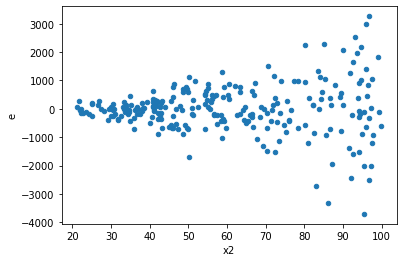

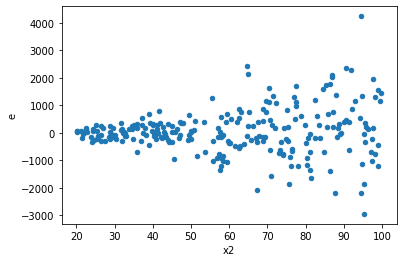

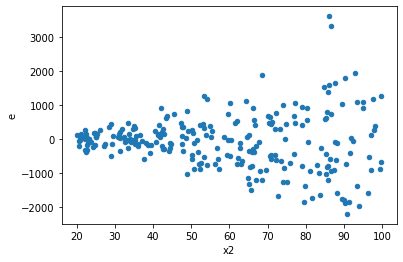

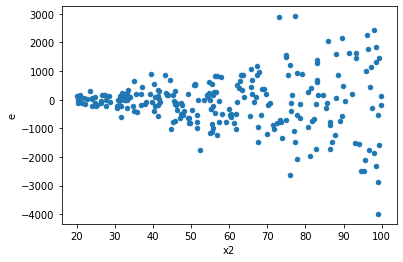

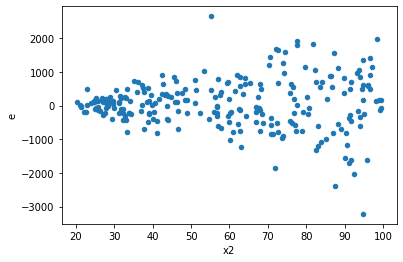

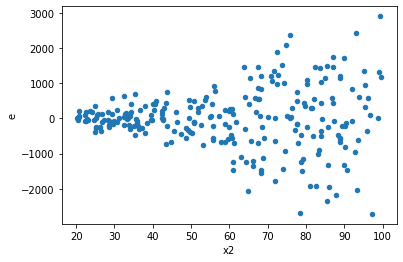

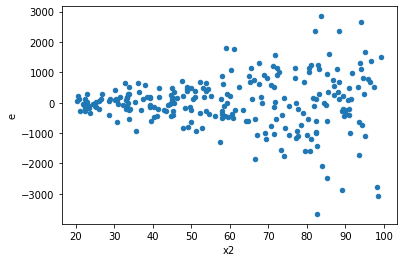

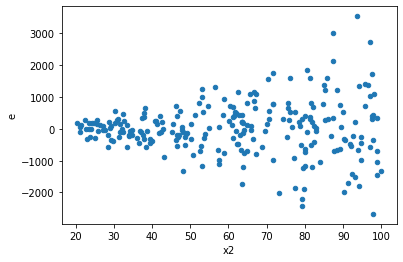

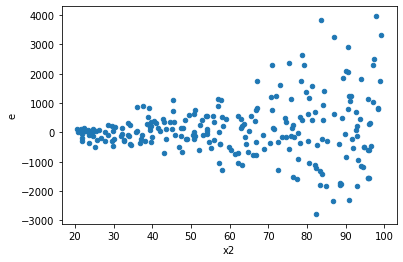

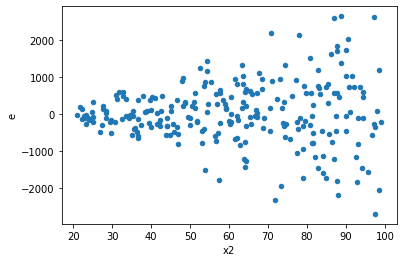

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,129.0,117.0,77529874.12468706,99153812.69353636,601006.7761603649,847468.4845601398,1.4100814136811202,0.059203449267559494,0.9703982753662203,0.029601724633779747,Reject005=1 : Homoscedasticity
1.0,106.0,140.0,14304083.716805013,157466798.94351587,134944.18600759446,1124762.8495965418,8.335022670285639,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,133.0,113.0,48157560.45349589,128076256.82936849,362086.92070297664,1133418.2020298096,3.1302378993124784,1.5037191491984458e-09,0.9999999992481404,7.518595745992229e-10,Reject005=0 : Heteroscedasticity
6.0,122.0,124.0,20149977.275256786,163656878.77874392,165163.74815784252,1319813.5385382574,7.990939617554255,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,117.0,129.0,27429648.8444807,145065529.47670713,234441.44311521968,1124538.9881915282,4.796673204399519,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,135.0,111.0,24522944.45943773,211315873.99615386,181651.4404402795,1903746.6125779627,10.480217541703704,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
10.0,132.0,114.0,54657444.84413349,114040348.47769593,414071.55184949614,1000353.9340148766,2.415896309579071,2.1379515531272375e-06,0.9999989310242234,1.0689757765636188e-06,Reject005=0 : Heteroscedasticity
11.0,111.0,135.0,16768394.890156258,143550492.85032195,151066.62063203836,1063336.984076459,7.038861262849653,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
12.0,134.0,112.0,121279734.70065218,107501001.60304949,905072.6470197923,959830.371455799,1.0605009162704364,0.7504391559436274,0.6247804220281863,0.3752195779718137,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,129.0,117.0,77529874.12468706,99153812.69353636,601006.7761603649,847468.4845601398,1.4100814136811202,0.059203449267559494,Reject005=1 : Homoscedasticity
1.0,106.0,140.0,14304083.716805013,157466798.94351587,134944.18600759446,1124762.8495965418,8.335022670285639,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,125.0,121.0,85794806.9931904,68295121.66158743,686358.4559455231,564422.4930709705,0.8223436138678085,0.2788156886019453,Reject005=1 : Homoscedasticity
3.0,121.0,125.0,104562699.54697853,105697183.73239961,864154.5417105664,845577.4698591969,0.9785026046213947,0.9050683979874424,Reject005=1 : Homoscedasticity
4.0,145.0,101.0,83970506.07690692,48295072.505233444,579106.938461427,478169.0347052816,0.825700752223212,0.28964277314366005,Reject005=1 : Homoscedasticity
5.0,133.0,113.0,48157560.45349589,128076256.82936849,362086.92070297664,1133418.2020298096,3.1302378993124784,1.5037191491984458e-09,Reject005=0 : Heteroscedasticity
6.0,122.0,124.0,20149977.275256786,163656878.77874392,165163.74815784252,1319813.5385382574,7.990939617554255,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,117.0,129.0,27429648.8444807,145065529.47670713,234441.44311521968,1124538.9881915282,4.796673204399519,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,135.0,111.0,24522944.45943773,211315873.99615386,181651.4404402795,1903746.6125779627,10.480217541703704,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    814
Reject005=1 : Homoscedasticity      186
Name: Result_test, dtype: int64